# CREDIT RISK SCORING PROJECT
* Dataset: *https://github.com/gastonstat/CreditScoring*

## DECISION TREES AND ENSEMBLE LEARNING



### 1. DATA CLEANING AND PREPARATION
* Download the dataset
* Loading the libraries
* Re-encoding Categorical VAriables
* Doing the train/validation/test split

In [220]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [221]:
data="https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"

!wget $data

--2022-01-11 16:48:47--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.3’

CreditScoring.csv.3 100%[===================>] 178.21K   857KB/s    in 0.2s    

2022-01-11 16:48:49 (857 KB/s) - ‘CreditScoring.csv.3’ saved [182489/182489]



In [222]:
!head CreditScoring.csv  

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [223]:
df=pd.read_csv(data)

df.head() 

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


The dataset consists of 4455 rows and 14 columns.These are the brief descriptions of the columns names and what they represent.

1. **Status** -credit status
2. **Seniority** -job seniority (years)
3. **Home** -type of home ownership
4. **Time** -time of requested loan
5. **Age** -client's age
6. **Marital** -marital status
7. **Records** -existance of records
8. **Job** -type of job
9. **Expenses** -amount of expenses
10. **Income** -amount of income
11. **Assets** -amount of assets
12. **Debt** -amount of debt
13. **Amount** -amount requested of loan
14. **Price** -price of good

In [224]:
df.columns=df.columns.str.lower()
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [225]:
# Re-encoding categorical variables
status_values={
    1:'ok',
    2:'default',
    0:'unk'}
df.status=df.status.map(status_values)

home_values={
    1:'rent',
    2:'owner',
    3:'private',
    4:'ignore',
    5:'parents',
    6:'other',
    0:'unk'
}

df.home=df.home.map(home_values)

marital_values={
    1:'single',
    2:"married",
    3:'widow',
    4:'separated',
    5:'divorced',
    0:'unk'

}
df.marital=df.marital.map(marital_values)

records_values={
    1:'no',
    2:'yes',
    0:'unk'
}
df.records=df.records.map(records_values)


job_values={
    1:'fixed',
    2:'partime',
    3:'freeelance',
    4:'others',
    0:'unk'
}

df.job=df.job.map(job_values)





In [226]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freeelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freeelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [227]:
# dealing with missing values

cols=['income', 'assets','debt']
for c in cols:
        df[c]=df[c].replace(to_replace=99999999, value=np.nan)


In [228]:

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [229]:
# Drop Missing VAlues on status

df=df[df.status!='unk'].reset_index(drop=True)

In [230]:
# Doing Test/Train/Val Split

from sklearn.model_selection import train_test_split

df_full_train, df_test=train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val=train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train=df_train.reset_index(inplace=False, drop=True)

df_val=df_val.reset_index(drop=True)

df_test=df_test.reset_index(drop=True)


df_train


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,default,10,owner,36,36,married,no,freeelance,75,0.0,10000.0,0.0,1000,1400
1,default,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,ok,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,default,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,ok,5,owner,36,46,married,no,freeelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,ok,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,ok,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,ok,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,ok,15,owner,48,43,married,no,freeelance,60,100.0,18000.0,0.0,2500,2976


In [231]:
y_train=(df_train.status=='default').astype('int').values
y_val=(df_val.status=='default').astype('int').values
y_test=(df_test.status=='default').astype('int').values



In [232]:
del df_train['status']
del df_val['status']
del df_test['status']




In [233]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freeelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freeelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freeelance,60,100.0,18000.0,0.0,2500,2976


<AxesSubplot:xlabel='marital', ylabel='income'>

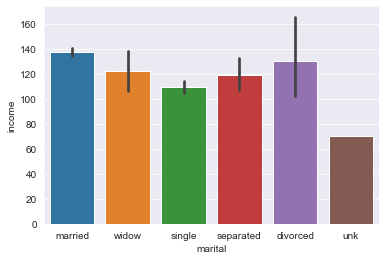

In [234]:
sns.set_style('darkgrid')

sns.barplot(x='marital', y='income',data=df)


<AxesSubplot:xlabel='assets', ylabel='Count'>

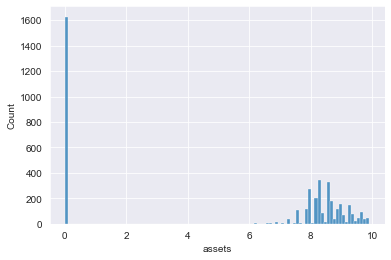

In [235]:
assets_logs=np.log1p(df.assets[df.assets<=20000])
sns.histplot(assets_logs, bins=100)

### 2. DECISION TREES

* Training a decision Tree
* Overfitting
* Controlling the size of a tree

In [236]:
def assess_risk(client):

    if client['records']=='yes':
        if client['job'] =='parttime':
            if client ['marital']=='single':
                return 'default'

            else:
                return 'ok'

    else:
        if client['assets']> 6000:
            return 'ok'

        else:
            return 'default'


In [237]:
xi=df_train.iloc[0].to_dict()


assess_risk(xi)

'ok'

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [239]:
train_dicts=df_train.fillna(0).to_dict(orient='records')
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(train_dicts)

In [240]:
# lets get the feature names
dv.get_feature_names()

/home/leviscoffie/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freeelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [241]:
dt=DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [242]:
val_dicts=df_val.fillna(0).to_dict(orient='records'
)
X_val=dv.transform(val_dicts)

y_pred=dt.predict_proba(X_val)[:,1]

In [243]:
roc_auc_score(y_val, y_pred)

0.646748080695551

In [244]:
y_pred=dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

Here, we see that the model has overfitted on the training data. It has generalized and thats is why it performs purely on the validation data.

Lets try controlling the maximum depth of the decision tree to realize changes

In [245]:
dt=DecisionTreeClassifier(max_depth=4 )

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [218]:
y_pred=dt.predict_proba(X_train)[:,1]
auc=roc_auc_score(y_train, y_pred)
print('train:',auc)

y_pred=dt.predict_proba(X_val)[:,1]
auc=roc_auc_score(y_val, y_pred)
print('val:',auc)

train: 0.8745461523294462
val: 0.7583129495531714


In [219]:
from sklearn.tree import export_text
from sklearn import tree

print(export_text(dt,feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1850.00
|   |   |   |   |   |--- age <= 22.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  22.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1850.00
|   |   |   |   |   |--- amount <= 1450.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- amount >  1450.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.

/home/leviscoffie/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


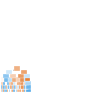

In [205]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(6,6), dpi=20)

tree.plot_tree(dt,
                feature_names=dv.get_feature_names(),
                filled=True, fontsize=2)

fig.savefig('DecisionTree.png')

### 3. DECISION TREE LEARNING ALGORITHM
* Finding the  best split  for one column
* Finding the best split for the entire dataset
* Stopping Criteria
* Decision Tree learning Algo

In [206]:
## demonstration
data=[
[8000,'default'],
[2000,'default'],
[0,'default'],
[5000,'ok'],
[5000,'ok'],
[4000,'ok'],
[9000,'ok'],
[3000,'default']
]
df_example=pd.DataFrame(data, columns=['assets','status'])

df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [207]:
from IPython.display import display

In [208]:
# what is the best split based on 'assets' columns
df_example.sort_values('assets')
Ts=[0,2000,3000,4000,5000,8000]



for t in Ts:

        print(t)
        df_right=df_example[df_example.assets>t]
        
        
        df_left=df_example[df_example.assets<=t]


        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))



        print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



#### Now To Find a Good Split Evaluation Criteria
Judginf form the misclassification rate, we can see that a threshold of 3000 is the best fit becasue its has the lowest average misclassifiaction amount.
**Now adding the second feature which is debt**

In [209]:
data=[
[8000,3000,'default'],
[2000,1000,'default'],
[0,1000,'default'],
[5000,1000,'ok'],
[5000,1000,'ok'],
[4000,1000,'ok'],
[9000,500,'ok'],
[3000,2000,'default']
]

df_example=pd.DataFrame(data, columns=['assets','debt','status'])

df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [210]:
#
# def gini(df_example):
#     Ts=[0,2000,3000,4000,5000,8000]
    
#     gini_left=[]
#     gini_right=[]

#     for t in Ts:

#         print(str(t))
#         df_left=df_example[df_example.assets<=t]
#         proba_left=list(df_left.status.value_counts(normalize=True))
#         df_right=df_example[df_example.assets>t]
#         proba_right=list(df_right.status.value_counts(normalize=True))
   
#         display(proba_left)
#         display(proba_right)
#     #     for (proba_l, proba_r) in zip(proba_left, proba_right):

#     #         print(proba_l, proba_r)
            


    
        
#         for i in proba_left:
#             if len(proba_left)==1:
            
#                 gini_l=i*(1-i)
#                 gini_left.append(gini_l)

#             else:
#                 gini_l=i*(1-i) +i*(1-i)
#                 gini_left.append(gini_l)

#         for i in proba_right:
#             if len(proba_right)==1:
            
#                 gini_r=i*(1-i)
#                 gini_right.append(gini_r)

#             else:
#                 for e in range(0,len(proba_right)):

                
#                 # gini_right.append(gini_r)


        
       


#     return 
            


        

        


#         # display(df_left)
#         # display(df_right)


#         # print()

In [211]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [212]:
thresholds={'assets':[0,2000,3000,4000,5000,8000],
'debt':[500,1000,2000]}

for feature, Ts in thresholds.items():
    print('###############')

    print(feature)
    for T in Ts:
        print(T)

        df_left=df_example[df_example[feature]<=T]
        df_right=df_example[df_example[feature]>T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))


        print()


print("#############")





###############
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

###############
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

#############


Still, the best split is Assets>3000, a summary of finding the best split involves selecting the conditon woiht the lowest impurity.


We first iterate through the features in the dataset. Pick oone feature and find all the possible thresholds of the feature. Iterate through the found thresholds  and split the dataset using "Feature>T(threshold)".

Compute the impurities of allthe features and their respective thrsholds and settel on the split threshold with the lowest impurity.

#### Stopping Criteria to Decide When to Stop Splitting:

* If the group is already pure.
* If the maximum depth limit has been reached.
* When the size of the samples_leaf is already minimal.

### 4. DECISION TREE PARAMETER TUNING:

* selecting `max_depth`
* selecting `min_samples_leaf`

We want to ensure that the evaluation metric is maximised or minimised in this case, AUC is maximised depending on the metric used.

In [213]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt=DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)


    y_pred=dt.predict_proba(X_val)[:,1]
    auc=roc_auc_score(y_val,y_pred)


    print("%4s ->%.3f"%(d,auc))

   1 ->0.606
   2 ->0.669
   3 ->0.739
   4 ->0.761
   5 ->0.766
   6 ->0.762
  10 ->0.700
  15 ->0.664
  20 ->0.646
None ->0.654


We see that a depth of 4,5,6 is good enough and selecing 4 is better because it is simpler.

Now to tune for the samples of the leaf

In [246]:
scores=[]

for d in [4,5,6,7,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:

        dt=DecisionTreeClassifier(max_depth=d)
        dt.fit(X_train, y_train)


        y_pred=dt.predict_proba(X_val)[:,1]
        auc=roc_auc_score(y_val,y_pred)

        scores.append((d,s,auc.round(3)))
        

In [247]:
df_scores=pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf','auc'])
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
10,5.0,2,0.767
9,5.0,1,0.767
17,5.0,500,0.767
16,5.0,200,0.766
15,5.0,100,0.766
...,...,...,...
49,15.0,15,0.655
64,NaN,2,0.654
58,20.0,15,0.654
66,NaN,10,0.654


In [248]:
df_scores_pivot=df_scores.pivot(index='min_samples_leaf', 
                                columns=['max_depth'],
                                values='auc')

Visualizing the pivot table as a heatmap now

<AxesSubplot:xlabel='max_depth', ylabel='min_samples_leaf'>

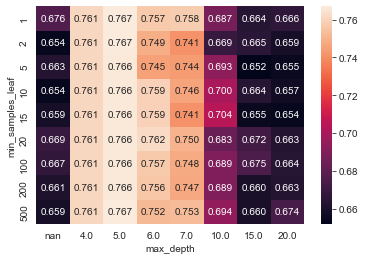

In [249]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')



In [250]:
# Using the optimized  max_depth and  min_samples _leaf we train the final decision tree.
dt=DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

### 5. ENSEMBLES AND RANDOM FOREST
Combining mulitple decision trees together and come up with an ultimate model that suits all

